In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (15, 5)  #

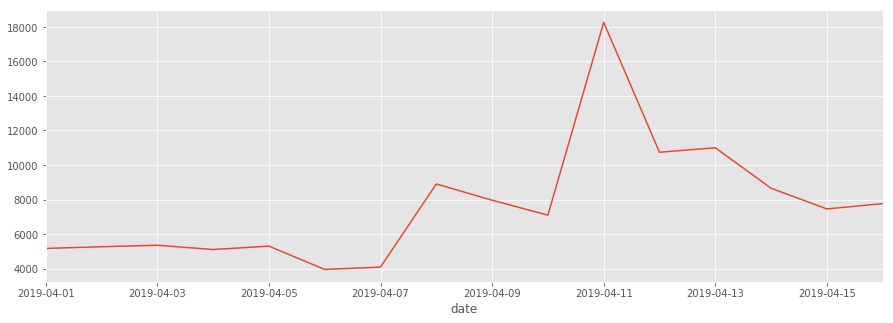

In [153]:
stat = pd.read_csv("test_data.csv")
stat['time']=pd.to_datetime(stat['time'], unit = 's')
stat ['date'] = stat['time'].dt.date
stat.groupby('date').size().plot()

# график числа рекламных событий по дням.

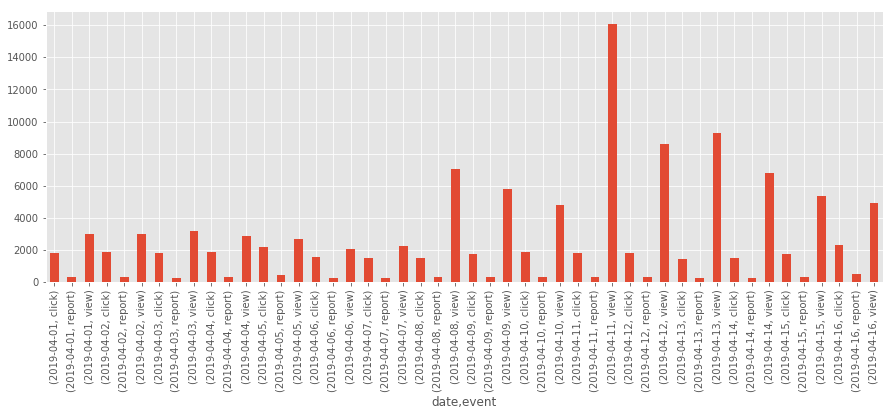

In [154]:
events = stat[['event','date']].copy()
event_counts = events.groupby(['date', 'event']).size()
event_counts.plot(kind = 'bar')

#из графика ниже видно что если до 7 апреля число оплат по моделям за просмотр и за клик было примерно равным, 
#далее число событий с оплатой за просмотр стало существенно превосходить вторую модель - с пиком 11 апреля

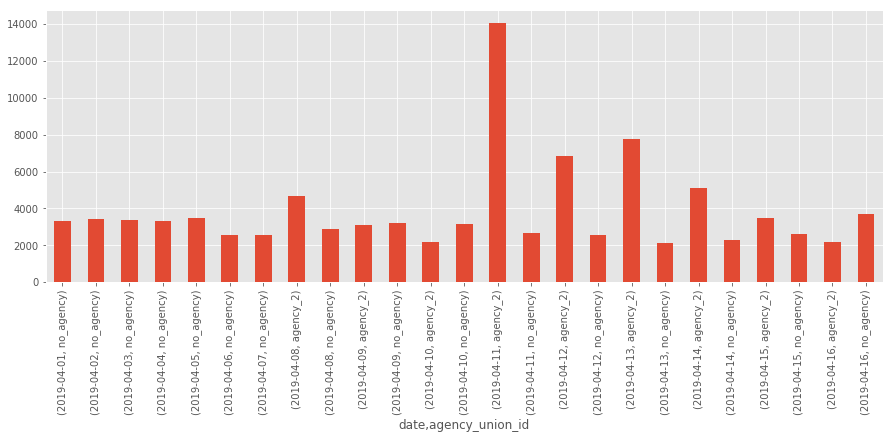

In [166]:
agency = stat[['agency_union_id','date']].copy()
agency_size = agency.groupby(['date', 'agency_union_id']).size().to_frame('size')
big_agencys = agency_size[agency_size['size']>500]['size']
big_agencys.plot(kind = 'bar')
# big_agencys

#график ниже показывает динамику для агенств (+ "неагентства"), количество размещений которых превышало 500 в сутки
#из графика видим, что количество рекламных событий увеличивалось за счет таковых для рекламного агенства №2


In [165]:
#можно предположить таким образом, что увеличение количества рекламных событий по модели оплаты за просмотр увеличилось
#за счет большого размещения от данного агенства. 

#детектировать резкие отклонения от средних величин можно было бы сравнивая текущее количество 
#рекламных событий с усредненным за предыдущие несколько дней, выбирая нужные отрезки
#времени группирую по колонке 'time' - похожим образом, как и было сгруппированно в первом
#сниппете по суткам.